In [ ]:
# 이 코드 블럭은 처음 한번만 실행하면 됩니다.
# ========================================================================
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
# ========================================================================

In [ ]:
import pandas as pd
import numpy as np
import folium
import time

from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 코랩에서의 환경설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 작업폴더는 변경 안하셔도 됩니다.

import os
print(f"변경 전 작업폴더 : {os.getcwd()}")
work_dir_path = "/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL"
os.chdir(work_dir_path)
print(f"변경 후 작업폴더 : {os.getcwd()}")

변경 전 작업폴더 : /content
변경 후 작업폴더 : /content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL


In [ ]:
# Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정합니다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=options)
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [ ]:
# # 해당 url로 이동합니다.
# # 테스트 코드.
# url = "https://www.naver.com/" 
# driver.get(url)
 
# update = driver.find_element_by_css_selector('#NM_TS_ROLLING_WRAP > div > div')
# print(update.text)

이슈
코로나바이러스감염증-19 현황


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  


## 로컬환경에서의 설정

[크롬 드라이버 설치링크](https://chromedriver.chromium.org/downloads)


In [ ]:
# #웹 드라이버 설정
# chrome_options = webdriver.ChromeOptions() # 웹드라이버에 크롭옵션을 설정해줍니다.
# chrome_options.add_argument("headless")    # selenium을 사용할 때, 창이 활성화되서 사용하는게 아니라, 백그라운드에서 작동하도록 설정

# # 크롬 드라이버가 설치된 파일의 경로를 입력해 줍니다.
# driver = webdriver.Chrome("../driver/chromedriver.exe", options=chrome_options)
# driver.implicitly_wait(10)  # 웹페이지 전체가 로딩되는 시간을 10초동안 기다린다.

## 본격적인 시작
- 저는 코랩에서 진행했습니다.

### selenium을 이용하여 스타벅스를 크롤링 해보겠습니다.


In [ ]:

starbucks_map_url = "https://www.starbucks.co.kr/store/store_map.do"
driver.get(starbucks_map_url)


In [ ]:
# 10초간 페이지를 기다린다.
driver.implicitly_wait(10)

In [ ]:

# 스타벅스 매장찾기 클릭
select = "#container > div > form > fieldset > div > section > header.find_store_header > h2 > a"
WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, select))).click()


In [ ]:
# 스타벅스 지역검색 클릭
select = "#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a"
WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, select))).click()

In [ ]:
# 스타벅스 서울 클릭
select = "#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a"
WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, select))).click()


In [ ]:
# 스타벅스 전체 클릭
select = "#mCSB_2_container > ul > li:nth-child(1) > a"
WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, select))).click()


In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
container = soup.find("div", id="mCSB_3_container")
li_all = container.find_all("li")
li_all[0]


In [ ]:
# 서울시 스타벅스 매장 갯수

starbucks_count = soup.find("span", "en t_006633 sidoSetResult").get_text()
print(type(starbucks_count))
starbucks_count

### 위의 내용까지가 selenium으로 정적인 페이지처리를 해주었고, 이제부터는 BeautifulSoup을 활용해서, 데이터 수집을 진행해보겠습니다.


### 위의 코드를 보시면 깔끔하게 출력하신것을 확인하실수 있습니다.<br/>
- 많이 해보시면 금방 금방 실력이 늘어갈거에요!!!

In [ ]:
for li in li_all:
  print(li.find("strong"))
  print(li.find("p"))
  break

<strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong>
<p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p>


In [ ]:

for li in li_all:
  print(li.find("strong").text.strip())
  print(li.find("p").text.strip())
  break

역삼아레나빌딩
서울특별시 강남구 언주로 425 (역삼동)1522-3232


In [ ]:
i = 0
for li in li_all:

  name = li.find("strong").text.strip()
  address = li.find("p").text.strip().replace("1522-3232","") # replace로 공통된 번호를 삭제해줍니다.
  gu = address.split(" ")[1] # 서울특별시 옆에 바로 지역구의 정보가 나옵니다.
  print(name, address, gu, sep=" | ")
  i += 1
  if i > 10:
    break

역삼아레나빌딩 | 서울특별시 강남구 언주로 425 (역삼동) | 강남구
논현역사거리 | 서울특별시 강남구 강남대로 538 (논현동) | 강남구
신사역성일빌딩 | 서울특별시 강남구 강남대로 584 (논현동) | 강남구
국기원사거리 | 서울특별시 강남구 테헤란로 125 (역삼동) | 강남구
대치재경빌딩R | 서울특별시 강남구 남부순환로 2947 (대치동) | 강남구
봉은사역 | 서울특별시 강남구 봉은사로 619 (삼성동) | 강남구
압구정윤성빌딩 | 서울특별시 강남구 논현로 834 (신사동) | 강남구
코엑스별마당 | 서울특별시 강남구 영동대로 513 (삼성동) | 강남구
삼성역섬유센터R | 서울특별시 강남구 테헤란로 518 (대치동) | 강남구
압구정R | 서울특별시 강남구 언주로 861 (신사동) | 강남구
수서역R | 서울특별시 강남구 광평로 281 (수서동) | 강남구


In [ ]:
i = 0
for li in li_all:

  name = li.find("strong").text.strip()
  main_address = " ".join(li.find("p").text.split(" ")[:3])
  address = li.find("p").text.strip().replace("1522-3232","") # replace로 공통된 번호를 삭제해줍니다.
  gu = address.split(" ")[1] # 서울특별시 옆에 바로 지역구의 정보가 나옵니다.
  sub_address = " ".join(address.split(" ")[3:])
  print(name, main_address, sub_address, gu, sep=" | ")
  i += 1
  if i > 10:
    break

역삼아레나빌딩 | 서울특별시 강남구 언주로 | 425 (역삼동) | 강남구
논현역사거리 | 서울특별시 강남구 강남대로 | 538 (논현동) | 강남구
신사역성일빌딩 | 서울특별시 강남구 강남대로 | 584 (논현동) | 강남구
국기원사거리 | 서울특별시 강남구 테헤란로 | 125 (역삼동) | 강남구
대치재경빌딩R | 서울특별시 강남구 남부순환로 | 2947 (대치동) | 강남구
봉은사역 | 서울특별시 강남구 봉은사로 | 619 (삼성동) | 강남구
압구정윤성빌딩 | 서울특별시 강남구 논현로 | 834 (신사동) | 강남구
코엑스별마당 | 서울특별시 강남구 영동대로 | 513 (삼성동) | 강남구
삼성역섬유센터R | 서울특별시 강남구 테헤란로 | 518 (대치동) | 강남구
압구정R | 서울특별시 강남구 언주로 | 861 (신사동) | 강남구
수서역R | 서울특별시 강남구 광평로 | 281 (수서동) | 강남구


In [ ]:
starbucks_data = list()

  
for li in li_all:

  name = li.find("strong").text.strip()
  main_address = " ".join(li.find("p").text.split(" ")[:3])
  address = li.find("p").text.strip().replace("1522-3232","") # replace로 공통된 번호를 삭제해줍니다.
  gu = address.split(" ")[1] # 서울특별시 옆에 바로 지역구의 정보가 나옵니다.
  sub_address = " ".join(address.split(" ")[3:])
  each = {
      "매장이름": name,
      "메인주소": main_address,
      "서브주소": sub_address,
      "구": gu,
      "브랜드": "스타벅스",
  }
  starbucks_data.append(each)

In [ ]:
len(starbucks_data)

571

In [ ]:
df_starbucks = pd.DataFrame(starbucks_data)
df_starbucks.head()

,매장이름,메인주소,서브주소,구,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로,425 (역삼동),강남구,스타벅스
1,논현역사거리,서울특별시 강남구 강남대로,538 (논현동),강남구,스타벅스
2,신사역성일빌딩,서울특별시 강남구 강남대로,584 (논현동),강남구,스타벅스
3,국기원사거리,서울특별시 강남구 테헤란로,125 (역삼동),강남구,스타벅스
4,대치재경빌딩R,서울특별시 강남구 남부순환로,2947 (대치동),강남구,스타벅스


In [ ]:
# df_starbucks.to_csv("/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL/starbucks_raw.csv")

### selenium을 이용하여 이디야를 크롤링 해보겠습니다.


In [ ]:
from selenium.webdriver.common.keys import Keys
gu_list = list(df_starbucks["구"].unique())
len(gu_list)

25

In [ ]:
url = "https://ediya.com/contents/find_store.html" # 이디야 매장지도
driver.get(url)
driver.current_url

'https://ediya.com/contents/find_store.html'

In [ ]:
# 이디야 주소검색 클릭
address_click = driver.find_element_by_xpath('//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a')
address_click.click()
driver.current_url

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


'https://ediya.com/contents/find_store.html#c'

In [ ]:
ediya_data = list()

# 지역벌 매장 검색
for gu in tqdm_notebook(gu_list):
  driver.find_element_by_xpath('//*[@id="keyword"]').clear()
  seoul = driver.find_element_by_xpath('//*[@id="keyword"]')
  seoul.send_keys(f'서울 {gu}')
  click = driver.find_element_by_xpath('//*[@id="keyword_div"]/form/button')
  click.click()
  # time.sleep(3)

  # 위에 코드가 서울의 각 지역구들을 순회한다.
  html = driver.page_source
  soup = BeautifulSoup(html, "html.parser")
  # print(soup)
  ul = soup.find("ul", id="placesList")
  # print(ul)
  dl_all = ul.find_all("dl")

  for dl in dl_all:
    name = dl.find("dt").text.strip()
    address = dl.find("dd").text.strip()
    gu = address.split(" ")[1]
    each = {
      "매장이름": name,
      "주소": address,
      "구": gu,
      "브랜드": "이디야",
    }
    ediya_data.append(each)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


In [ ]:
df_ediya = pd.DataFrame(ediya_data)
df_ediya.head()

,매장이름,주소,구,브랜드
0,강남YMCA점,서울 강남구 논현동,강남구,이디야
1,강남구청역아이티웨딩점,"서울 강남구 학동로 338 (논현동, 강남파라곤)",강남구,이디야
2,강남논현학동점,서울 강남구 논현로131길 28 (논현동),강남구,이디야
3,강남대치점,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",강남구,이디야
4,강남도산점,서울 강남구 도산대로37길 20 (신사동),강남구,이디야


In [ ]:
len(ediya_data)

741

In [ ]:
address_list = list(df_ediya.주소)
main_address = list()
sub_address = list()
i = 0
for address in address_list:
  # print(" ".join(address.split(" ")[:3]))
  # print(" ".join(address.split(" ")[3:]))
  main_address.append(" ".join(address.split(" ")[:3]))
  sub_address.append(" ".join(address.split(" ")[3:]))




In [ ]:
df_ediya["메인주소"] = main_address
df_ediya["서브주소"] = sub_address

In [ ]:
df = df_ediya.drop(columns=['주소'])
df = df[['매장이름', '메인주소', '서브주소', '구', '브랜드']]
df

,매장이름,메인주소,서브주소,구,브랜드
0,강남YMCA점,서울 강남구 논현동,,강남구,이디야
1,강남구청역아이티웨딩점,서울 강남구 학동로,"338 (논현동, 강남파라곤)",강남구,이디야
2,강남논현학동점,서울 강남구 논현로131길,28 (논현동),강남구,이디야
3,강남대치점,서울 강남구 역삼로,"415 (대치동, 성진빌딩)",강남구,이디야
4,강남도산점,서울 강남구 도산대로37길,20 (신사동),강남구,이디야
...,...,...,...,...,...
736,용산중앙점,서울 용산구 한강대로,52-1 (한강로3가),용산구,이디야
737,용산청파점,서울 용산구 청파로71길,"10 (청파동1가, 새마을금고)",용산구,이디야
738,용산효창점,서울 용산구 효창원로66길,2 (효창동),용산구,이디야
739,용산후암점,서울 용산구 후암로,"40-2 (후암동, 성원빌딩)",용산구,이디야


In [ ]:
# df.to_csv("/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL/ediya_raw.csv")

### 크롤링이 끝났습니다. 이제부터는 분석을 시작하겠습니다.

In [ ]:
df_coffee = pd.concat([df_starbucks, df])
df_coffee.reset_index(drop=True, inplace=True)
df_coffee

In [ ]:
# df_coffee.to_csv("/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL/coffee_raw.csv")
df_coffee = pd.read_csv("/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL/coffee_raw.csv", index_col=[0])
df_coffee

,매장이름,메인주소,서브주소,구,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로,425 (역삼동),강남구,스타벅스
1,논현역사거리,서울특별시 강남구 강남대로,538 (논현동),강남구,스타벅스
2,신사역성일빌딩,서울특별시 강남구 강남대로,584 (논현동),강남구,스타벅스
3,국기원사거리,서울특별시 강남구 테헤란로,125 (역삼동),강남구,스타벅스
4,대치재경빌딩R,서울특별시 강남구 남부순환로,2947 (대치동),강남구,스타벅스
...,...,...,...,...,...
1307,용산중앙점,서울 용산구 한강대로,52-1 (한강로3가),용산구,이디야
1308,용산청파점,서울 용산구 청파로71길,"10 (청파동1가, 새마을금고)",용산구,이디야
1309,용산효창점,서울 용산구 효창원로66길,2 (효창동),용산구,이디야
1310,용산후암점,서울 용산구 후암로,"40-2 (후암동, 성원빌딩)",용산구,이디야


In [ ]:
df_coffee["위도"] = np.nan
df_coffee["경도"] = np.nan
df_coffee.head()

,매장이름,메인주소,서브주소,구,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로,425 (역삼동),강남구,스타벅스,NaN,NaN
1,논현역사거리,서울특별시 강남구 강남대로,538 (논현동),강남구,스타벅스,NaN,NaN
2,신사역성일빌딩,서울특별시 강남구 강남대로,584 (논현동),강남구,스타벅스,NaN,NaN
3,국기원사거리,서울특별시 강남구 테헤란로,125 (역삼동),강남구,스타벅스,NaN,NaN
4,대치재경빌딩R,서울특별시 강남구 남부순환로,2947 (대치동),강남구,스타벅스,NaN,NaN


In [ ]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')
# 위도, 경도 반환하는 함수
def geocoding(address):
    geo = geo_local.geocode(address)
    return geo.latitude, geo.longitude

## 일단 주소문제를 해결하겠습니다.
- 도로명 주소와 지번주소의 차이가 있는지는 잘 모르겠습니다.
  - 저는 도로명 주소를 사용하겠습니다.
- 무슨무슨길 혹은 무슨무슨로 숫자 : 이런식의 패턴이므로 메인주소에 서브주소.split(" ")[0]으로 한 번 진행해보겠습니다.
- 서브주소가 없는경우는 drop 시키겠습니다.

In [ ]:
nan_result = list()

for idx, rows in df_coffee.iterrows():
  try:
    if rows.서브주소.split(" ")[0].endswith(","):
      pass
    # print(rows.서브주소.split(" ")[0])
  except:
    nan_result.append(idx)
    print(f"{idx}, {rows.서브주소}")
  

571, nan
585, nan
598, nan
644, nan
747, nan
780, nan
918, nan
922, nan
925, nan
936, nan
943, nan
948, nan
950, nan
952, nan
963, nan


##  서브주소가 없는 경우는 위도 경도를 구할 수 없기에 drop 시켰습니다

In [ ]:
nan_result

[571, 585, 598, 644, 747, 780, 918, 922, 925, 936, 943, 948, 950, 952, 963]

In [ ]:
len(df_coffee), len(nan_result)

(1312, 15)

In [ ]:
df_coffee = df_coffee.drop(nan_result)
df_coffee.reset_index(drop=True, inplace=True)
len(df_coffee)

1297

In [ ]:
real_address = list()
for idx, rows in df_coffee.iterrows():
  if rows.서브주소.split(" ")[0].endswith(","):
    # comma가 있는부분 처리해줍니다.
    # print("".join(rows.메인주소 + " " + rows.서브주소.split(" ")[0][:-1]))
    real_address.append("".join(rows.메인주소 + " " + rows.서브주소.split(" ")[0][:-1]))

  else:
    # print("".join(rows.메인주소 + " " + rows.서브주소.split(" ")[0]))
    real_address.append("".join(rows.메인주소 + " " + rows.서브주소.split(" ")[0]))


  # if idx > 100:
  #   break

In [ ]:
len(real_address)


1297

In [ ]:
# 편의를 위해서 read_address를 Dataframe에 추가해 주겠습니다.
df_coffee["실제주소"] = real_address

In [ ]:
# # 테스트
# df_coffee.loc[0, "위도"],df_coffee.loc[0, "경도"] = geocoding(real_address[0])
# df_coffee.head()

,매장이름,메인주소,서브주소,구,브랜드,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로,425 (역삼동),강남구,스타벅스,37.502046,127.043645
1,논현역사거리,서울특별시 강남구 강남대로,538 (논현동),강남구,스타벅스,NaN,NaN
2,신사역성일빌딩,서울특별시 강남구 강남대로,584 (논현동),강남구,스타벅스,NaN,NaN
3,국기원사거리,서울특별시 강남구 테헤란로,125 (역삼동),강남구,스타벅스,NaN,NaN
4,대치재경빌딩R,서울특별시 강남구 남부순환로,2947 (대치동),강남구,스타벅스,NaN,NaN


In [ ]:
from tqdm import tqdm_notebook
error_index = list()

for idx, address in tqdm_notebook(enumerate(real_address)):
  try:
    df_coffee.loc[idx, "위도"],df_coffee.loc[idx, "경도"] = geocoding(real_address[idx])
  except:
    print(f"{idx}번째에서 에러가 발생했습니다.")
    error_index.append(idx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


0it [00:00, ?it/s]

104번째에서 에러가 발생했습니다.
121번째에서 에러가 발생했습니다.
135번째에서 에러가 발생했습니다.
141번째에서 에러가 발생했습니다.
145번째에서 에러가 발생했습니다.
147번째에서 에러가 발생했습니다.
148번째에서 에러가 발생했습니다.
152번째에서 에러가 발생했습니다.
157번째에서 에러가 발생했습니다.


## 여기서부터는 시각화입니다.

In [21]:
# 안전하게 위도,경도가 입력된 데이터를 저장.
# df_coffee.to_csv("/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL/coffee_v1_lat_lon.csv")
import pandas as pd
df_coffee = pd.read_csv("/content/drive/MyDrive/Study/EDIYA_STARBUCKS_IN_SEOUL/coffee_v1_lat_lon.csv")
len(df_coffee)

1312

In [22]:
real_address = list()
for idx, rows in df_coffee.iterrows():
  if str(rows.서브주소).split(" ")[0].endswith(","):
    # comma가 있는부분 처리해줍니다.
    # print("".join(rows.메인주소 + " " + rows.서브주소.split(" ")[0][:-1]))
    real_address.append("".join(rows.메인주소 + " " + str(rows.서브주소).split(" ")[0][:-1]))
  else:
    # print("".join(rows.메인주소 + " " + rows.서브주소.split(" ")[0]))
    real_address.append("".join(rows.메인주소 + " " + str(rows.서브주소).split(" ")[0]))


In [23]:
df_coffee["진짜주소"] = real_address
df_coffee.head()

,Unnamed: 0,매장이름,메인주소,서브주소,구,브랜드,위도,경도,진짜주소
0,0,역삼아레나빌딩,서울특별시 강남구 언주로,425 (역삼동),강남구,스타벅스,37.502046,127.043645,서울특별시 강남구 언주로 425
1,1,논현역사거리,서울특별시 강남구 강남대로,538 (논현동),강남구,스타벅스,37.521651,127.017962,서울특별시 강남구 강남대로 538
2,2,신사역성일빌딩,서울특별시 강남구 강남대로,584 (논현동),강남구,스타벅스,37.521651,127.017962,서울특별시 강남구 강남대로 584
3,3,국기원사거리,서울특별시 강남구 테헤란로,125 (역삼동),강남구,스타벅스,37.498390,127.028483,서울특별시 강남구 테헤란로 125
4,4,대치재경빌딩R,서울특별시 강남구 남부순환로,2947 (대치동),강남구,스타벅스,37.496669,127.070247,서울특별시 강남구 남부순환로 2947


In [24]:
len(df_coffee)

1312

## Data set을 보시면 위도,경도까지 다 구했습니다.
- 이제는 folium으로 지도상에 표현해주는 것을 해보도록하시죠

In [ ]:
import folium
seoul_center = [37.535855, 126.991558]
seoul_map = folium.Map(location=seoul_center, zoom_start=11.5, tiles="StamenToner") # titles를 설정해준 이유는 렉을 조금더 줄이기 위해서 썻습니다. 실제로 효과가는 없는것 같아요..


for idx, rows in df_coffee.iterrows():
  if rows["브랜드"] == "이디야":
    mk_color = "blue"
    ic_color = "yellow"
  elif rows["브랜드"] == "스타벅스":
    mk_color = "darkgreen"
    ic_color = "lightgray"

  folium.Marker(
      location=[rows["위도"], rows["경도"]],
      popup = rows["진짜주소"],
      tooltip = rows["매장이름"],
      icon = folium.Icon(
          color = mk_color,
          icon_color = ic_color,
          icon = "coffee",
          prefix = "fa",
      )
  ).add_to(seoul_map)
seoul_map

Output hidden; open in https://colab.research.google.com to view.

In [17]:
df_coffee["값"] = 1
df_coffee.head()

,Unnamed: 0,매장이름,메인주소,서브주소,구,브랜드,위도,경도,진짜주소,값
0,0,역삼아레나빌딩,서울특별시 강남구 언주로,425 (역삼동),강남구,스타벅스,37.502046,127.043645,서울특별시 강남구 언주로 425,1
1,1,논현역사거리,서울특별시 강남구 강남대로,538 (논현동),강남구,스타벅스,37.521651,127.017962,서울특별시 강남구 강남대로 538,1
2,2,신사역성일빌딩,서울특별시 강남구 강남대로,584 (논현동),강남구,스타벅스,37.521651,127.017962,서울특별시 강남구 강남대로 584,1
3,3,국기원사거리,서울특별시 강남구 테헤란로,125 (역삼동),강남구,스타벅스,37.498390,127.028483,서울특별시 강남구 테헤란로 125,1
4,4,대치재경빌딩R,서울특별시 강남구 남부순환로,2947 (대치동),강남구,스타벅스,37.496669,127.070247,서울특별시 강남구 남부순환로 2947,1


In [18]:
import numpy as np
gu_area = df_coffee.pivot_table(index="구", columns=["브랜드"], values="값", aggfunc=np.sum)
gu_area.head()

브랜드,스타벅스,이디야
구,,
강남구,88.0,72.0
강동구,16.0,NaN
강북구,6.0,20.0
강서구,22.0,45.0
관악구,11.0,27.0


In [ ]:
# 한글 폰트가 깨져서 나눔폰트를 사용할수 있게 해주는 코드
# 처음 한번만 실행
# 런타임 다시 시작하셔야 됩니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 75 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,331 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [19]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

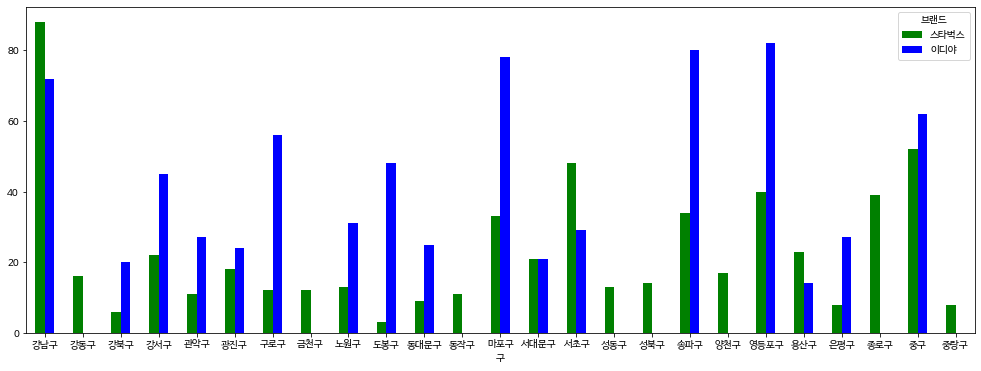

In [20]:
gu_area.plot.bar(rot=0, figsize=(17,6), color=["green", "blue"])